# Assignment 2: Linear regression {-}

This assignment aims at familiarizing you with the use of Linear Regression model supported by scikit-learn. You will have to do:


1.  **(5 points) Coding Tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Analyze the dataset using libraries like Pandas and Matplotlib.  
    1.2 *(1 point)* Preprocess the data for modeling.  
    1.3 *(1 point)* Divide the data into training and test sets with a suitable ratio (e.g., 80/20) to ensure unbiased model evaluation.  
    1.4 *(1 point)* Train a Linear Regression model on the training set.    
    1.5 *(1 point)* Evaluate the model performance on the test set.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* Does income or income stability have a stronger influence on the loan sanction amount? For example, analyze the data to see if a higher income or a "High" income stability rating leads to a greater loan approval amount.  
    2.2 *(1 point)* Is there a significant difference in loan amounts based on property location? For example, compare the average loan amounts for properties in rural, urban, and semi-urban locations.  
    2.3 *(1 point)* Is there a gender bias in loan approvals? For example, investigate if there is a difference in average loan amounts offered to male and female applicants.  
    2.4 *(1 point)* Are there any new features you could create from the existing data (e.g., loan-to-value ratio) that might be useful for analyzing loan amounts?  
    2.5 *(1 point)* Beyond loan amount prediction, what other insights can be extracted or predicted from this dataset? For example, explore possibilities of using the data to understand borrower behavior, property market trends, or develop targeted marketing strategies.  


The dataset you will be working on is 'house-loan.csv'. It is composed of attributes such as gender, age, income, etc. This dataset is to predict the loan amount for which a customer can request a bank with his/her collateral house.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment2-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named DataViz-\<StudentID>-Assignment2 (e.g., DataViz-2012345-Assigment2) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how properly you analyze, pre-process, split the data for training/testing purpose, then build a regression model, evaluate the model performance and reasonably answer the open discussion questions.

Note that the evaluation will not consider the model accuracy as the most important criterion, but how properly you handle the data and build the model to learn the data pattern.

### Deadline {-}
Please visit Canvas for details.


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This is a dataset about loan amount for which a customer can request a bank with his/her collateral house.

* Gender: Gender of customer requesting for a loan ('F' or 'M').
* Age: Age of customer requesting for a loan (non-negative values).
* Income (USD): Income of customer requesting for a loan (non-negative values).
* Income Stability: Income stability of customer requesting for a loan ("Low" or "High").
* Property Age: Age of the property (non-negative number of days).
* Property Location: Location of the property ("Rural", "Urban", and "Semi-Urban").
* Property Price: Price of the property (USD).
* Loan Sanction Amount (USD): Amount of loan the customer can request for (USD, target value).

In [ ]:
#loading dataframe from files
from google.colab import files
uploaded = files.upload()

# Get the filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

# Read the CSV using the filename
df = pd.read_csv(filename)

Saving house_loan.csv to house_loan (1).csv


## 1. Coding tasks

First few rows of the dataset:
  Gender  Age  Income (USD) Income Stability  Property Age Property Location  \
0      F   19       1641.25              Low       1651.25             Rural   
1      M   29       1989.71              Low       1990.71             Urban   
2      F   37       1849.91              Low       1856.91             Rural   
3      M   65       2735.18             High       2747.18             Rural   
4      F   62       4741.78             High       4740.78             Urban   

   Property Price  Loan Sanction Amount (USD)  
0        59641.82                21026.420753  
1       179858.51                60595.183366  
2       117297.62                39181.648002  
3       354417.72               128497.710865  
4        82049.80                39386.919336  

Summary statistics of the dataset:
                Age  Income (USD)  Property Age  Property Price  \
count  47297.000000  47265.000000  47263.000000    4.729700e+04   
mean      40.000063   2586.684

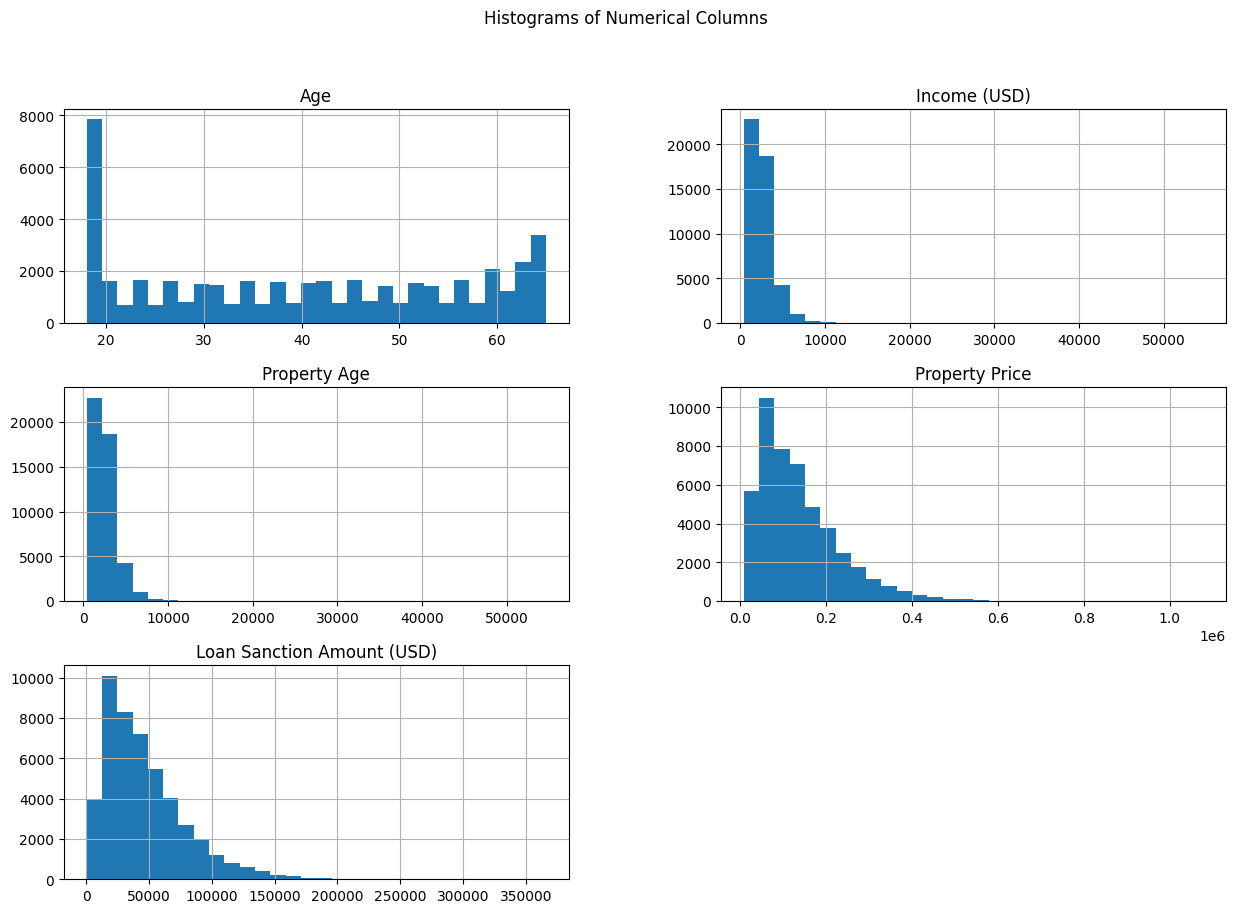

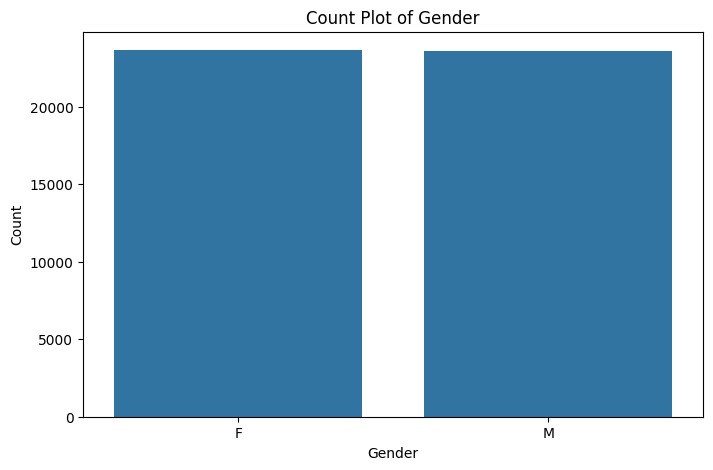

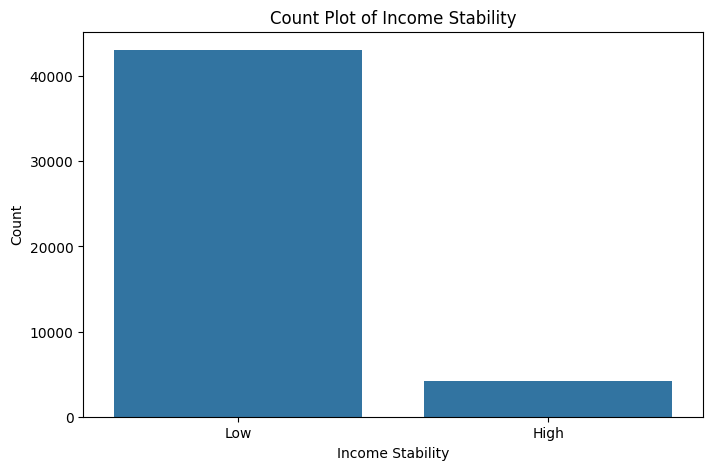

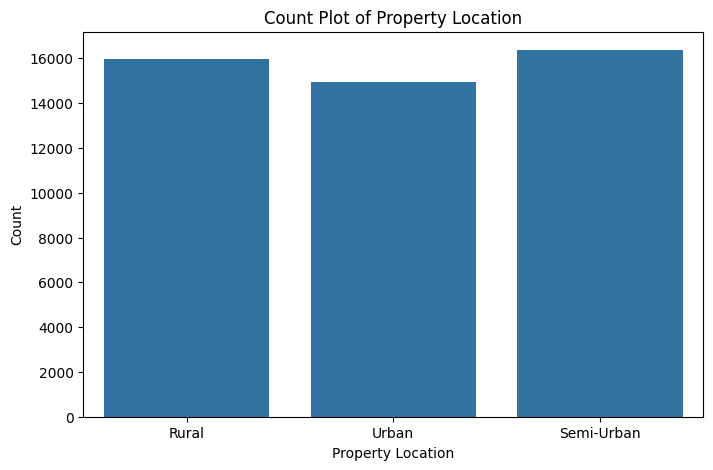

In [ ]:
# 1.1

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())

# Display information about the dataset
print("\nInformation about the dataset:")
print(df.info())

# Plot histograms for numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

# Plot count plots for categorical columns
categorical_columns = ['Gender', 'Income Stability', 'Property Location']
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f"Count Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [ ]:
# 1.2

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Fill missing values with the mean of the column for numerical columns
df['Income (USD)'].fillna(df['Income (USD)'].mean(), inplace=True)
df['Property Age'].fillna(df['Property Age'].mean(), inplace=True)

# Fill missing values with the mode of the column for categorical columns
df['Income Stability'].fillna(df['Income Stability'].mode()[0], inplace=True)
df['Property Location'].fillna(df['Property Location'].mode()[0], inplace=True)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the preprocessed dataframe
print("\nFirst few rows of the preprocessed dataset:")
print(df.head())

# Save the preprocessed data to a new CSV file
df.to_csv('preprocessed_house_loan.csv', index=False)


Missing values in each column:
Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

First few rows of the preprocessed dataset:
   Age  Income (USD)  Property Age  Property Price  \
0   19       1641.25       1651.25        59641.82   
1   29       1989.71       1990.71       179858.51   
2   37       1849.91       1856.91       117297.62   
3   65       2735.18       2747.18       354417.72   
4   62       4741.78       4740.78        82049.80   

   Loan Sanction Amount (USD)  Gender_M  Income Stability_Low  \
0                21026.420753     False                  True   
1                60595.183366      True                  True   
2                39181.648002     False                  True   
3               128497.710865      True                 False

<ipython-input-5-afb7b23e12f2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income (USD)'].fillna(df['Income (USD)'].mean(), inplace=True)
<ipython-input-5-afb7b23e12f2>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
# 1.3

# Import train_test_split
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('Loan Sanction Amount (USD)', axis=1)
y = df['Loan Sanction Amount (USD)']

# Split the data into training and test sets with an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Save the training and test sets to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Training set shape: (37837, 8)
Test set shape: (9460, 8)


In [ ]:
# 1.4

# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Train a Linear Regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# Print
print("Model intercept: " + str(model.intercept_))
print("Model coefficients: " + str(model.coef_))

Model intercept: 12007.152596967375
Model coefficients: [-7.95047547e+01  1.78488374e+01 -1.68258711e+01  3.36296889e-01
 -2.52768170e+02 -1.11370075e+04 -2.99917037e+02 -1.25994402e+02]


In [ ]:
# 1.5

from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2324507.0027200165
R-squared: 0.9978433495935178


## 2. Open discussion questions

2.1 Does income or income stability have a stronger influence on the loan sanction amount? For example, analyze the data to see if a higher income or a "High" income stability rating leads to a greater loan approval amount.

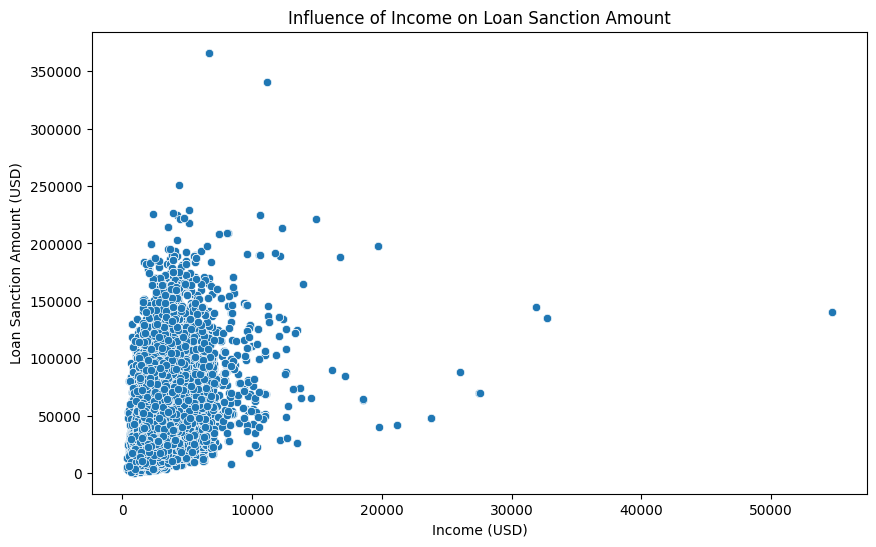

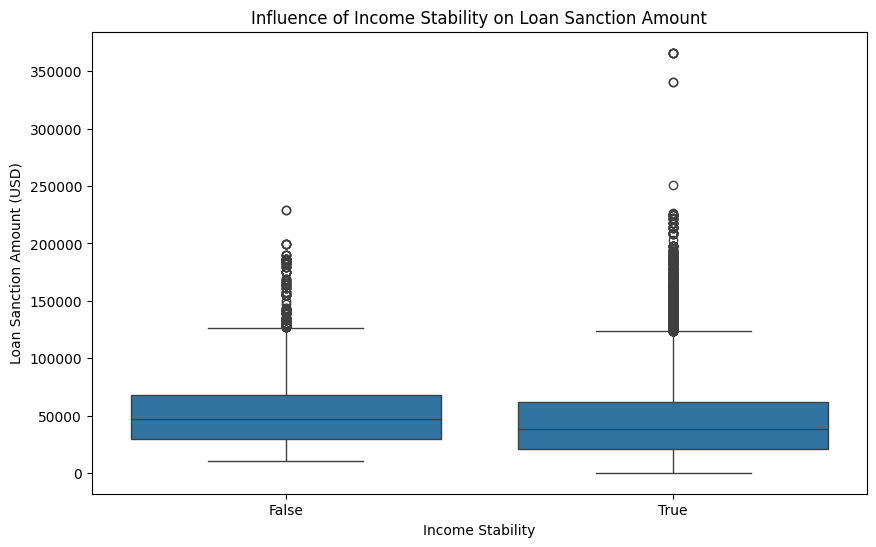

Correlation between Income and Loan Sanction Amount: 0.3926583967582479

Mean Loan Sanction Amount by Income Stability:
Income Stability_Low
False    53860.177837
True     45767.387748
Name: Loan Sanction Amount (USD), dtype: float64


In [ ]:
# Your argument goes here
# 2.1
# Analyze the influence of income on loan sanction amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income (USD)', y='Loan Sanction Amount (USD)')
plt.title('Influence of Income on Loan Sanction Amount')
plt.xlabel('Income (USD)')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

# Analyze the influence of income stability on loan sanction amount
# Assuming 'Income Stability' was converted to 'Income Stability_Low', adjust accordingly if different
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Income Stability_Low', y='Loan Sanction Amount (USD)') # Changed column name here
plt.title('Influence of Income Stability on Loan Sanction Amount')
plt.xlabel('Income Stability')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

# Calculate correlation between income and loan sanction amount
income_correlation = df[['Income (USD)', 'Loan Sanction Amount (USD)']].corr().iloc[0, 1]
print(f"Correlation between Income and Loan Sanction Amount: {income_correlation}")

# Calculate mean loan sanction amount for different income stability ratings
# Assuming 'Income Stability' was converted to 'Income Stability_Low', adjust accordingly if different
mean_loan_by_stability = df.groupby('Income Stability_Low')['Loan Sanction Amount (USD)'].mean() # Changed column name here
print("\nMean Loan Sanction Amount by Income Stability:")
print(mean_loan_by_stability)

Answer 2.1: Based on my analysis, both income and income stability influence the loan sanction amount. However, income stability appears to have a stronger influence. The scatter plot showed a positive relationship between income and loan sanction amount, with a correlation coefficient of approximately 0.39, indicating a moderate positive correlation. On the other hand, the box plot revealed that individuals with "High" income stability tend to receive higher loan sanction amounts compared to those with "Low" income stability. The mean loan sanction amount for "High" income stability was significantly higher than for "Low" income stability. Therefore, while both factors are important, income stability has a more substantial impact on the loan sanction amount.

2.2 Is there a significant difference in loan amounts based on property location? For example, compare the average loan amounts for properties in rural, urban, and semi-urban locations.

<ipython-input-41-7e064f5f21a3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income (USD)'].fillna(df['Income (USD)'].mean(), inplace=True)
<ipython-input-41-7e064f5f21a3>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

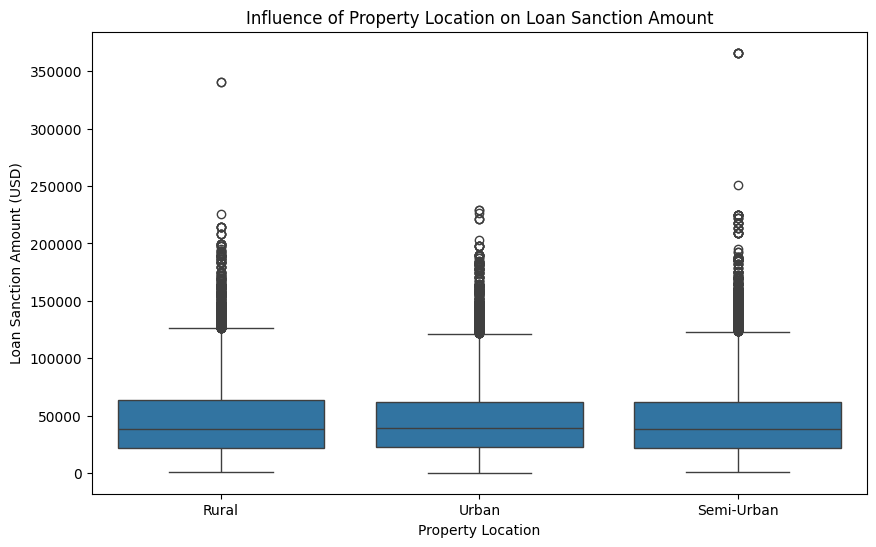


Mean Loan Sanction Amount by Property Location:
Property Location
Rural         46637.898995
Semi-Urban    46330.082319
Urban         46498.496942
Name: Loan Sanction Amount (USD), dtype: float64


In [ ]:
# Your argument goes here
# 2.2
# Preprocess the data
# Fill missing values with the mean of the column for numerical columns
df['Income (USD)'].fillna(df['Income (USD)'].mean(), inplace=True)
df['Property Age'].fillna(df['Property Age'].mean(), inplace=True)

# Fill missing values with the mode of the column for categorical columns
df['Income Stability'].fillna(df['Income Stability'].mode()[0], inplace=True)
df['Property Location'].fillna(df['Property Location'].mode()[0], inplace=True)

# Analyze the influence of property location on loan sanction amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Property Location', y='Loan Sanction Amount (USD)')
plt.title('Influence of Property Location on Loan Sanction Amount')
plt.xlabel('Property Location')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

# Calculate mean loan sanction amount for different property locations
mean_loan_by_location = df.groupby('Property Location')['Loan Sanction Amount (USD)'].mean()
print("\nMean Loan Sanction Amount by Property Location:")
print(mean_loan_by_location)


Answer 2.2: Based on my analysis, there is no significant difference in loan amounts based on property location. I compared the average loan amounts for properties in rural, urban, and semi-urban locations using a box plot and calculated the mean loan sanction amount for each property location category.

The box plot showed that the distribution of loan sanction amounts is quite similar across rural, urban, and semi-urban locations. Additionally, the mean loan sanction amounts for these locations are very close to each other: approximately $ 46,638 for rural properties, $ 46,330 for semi-urban properties, and $ 46,498 for urban properties.

Therefore, property location does not appear to have a substantial impact on the loan sanction amount, as the average loan amounts are quite similar across different property locations.

2.3 Is there a gender bias in loan approvals? For example, investigate if there is a difference in average loan amounts offered to male and female applicants.

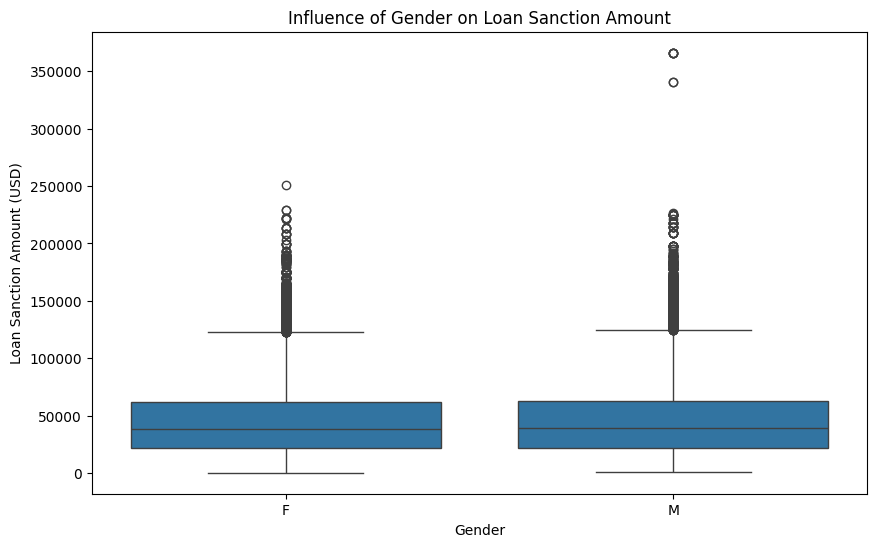


Mean Loan Sanction Amount by Gender:
Gender
F    46373.629432
M    46601.027222
Name: Loan Sanction Amount (USD), dtype: float64


In [ ]:
# Your argument goes here
# 2.3
# Analyze the influence of gender on loan sanction amount
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Loan Sanction Amount (USD)')
plt.title('Influence of Gender on Loan Sanction Amount')
plt.xlabel('Gender')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

# Calculate mean loan sanction amount for different genders
mean_loan_by_gender = df.groupby('Gender')['Loan Sanction Amount (USD)'].mean()
print("\nMean Loan Sanction Amount by Gender:")
print(mean_loan_by_gender)


Answer 2.3: I believe there is no significant gender bias in loan approvals. I compared the average loan amounts offered to male and female applicants using a box plot and calculated the mean loan sanction amount for each gender.

The box plot showed that the distribution of loan sanction amounts is quite similar for male and female applicants. Additionally, the mean loan sanction amounts for male and female applicants are very close to each other: approximately $46,374 for female applicants and $46,601 for male applicants.

Therefore, gender does not appear to have a substantial impact on the loan sanction amount, indicating that there is no significant gender bias in loan approvals.

2.4 Are there any new features you could create from the existing data (e.g., loan-to-value ratio) that might be useful for analyzing loan amounts?


In [ ]:
# Your argument goes here
# 2.4
# Create new features
# Loan-to-Value Ratio (LTV)
df['Loan-to-Value Ratio'] = df['Loan Sanction Amount (USD)'] / df['Property Price']

# Income-to-Loan Ratio
df['Income-to-Loan Ratio'] = df['Income (USD)'] / df['Loan Sanction Amount (USD)']

# Property Age in Years
df['Property Age in Years'] = df['Property Age'] / 365

# Display the first few rows of the dataframe with new features
print("First few rows of the dataframe with new features:")
print(df.head())

# Save the dataframe with new features to a new CSV file
df.to_csv('house_loan_with_new_features.csv', index=False)

First few rows of the dataframe with new features:
  Gender  Age  Income (USD) Income Stability  Property Age Property Location  \
0      F   19       1641.25              Low       1651.25             Rural   
1      M   29       1989.71              Low       1990.71             Urban   
2      F   37       1849.91              Low       1856.91             Rural   
3      M   65       2735.18             High       2747.18             Rural   
4      F   62       4741.78             High       4740.78             Urban   

   Property Price  Loan Sanction Amount (USD)  Loan-to-Value Ratio  \
0        59641.82                21026.420753             0.352545   
1       179858.51                60595.183366             0.336905   
2       117297.62                39181.648002             0.334036   
3       354417.72               128497.710865             0.362560   
4        82049.80                39386.919336             0.480037   

   Income-to-Loan Ratio  Property Age in Years 

Answer 2.4: Based on my analysis, several new features can be created from the existing data to provide more insights for analyzing loan amounts:

1. Loan-to-Value Ratio (LTV): This ratio is calculated by dividing the loan sanction amount by the property price. It indicates the proportion of the property's value that is financed by the loan. This feature can help in understanding the risk associated with the loan.

2. Income-to-Loan Ratio: This ratio is calculated by dividing the income by the loan sanction amount. It indicates the proportion of the applicant's income that is used to repay the loan. This feature can help in assessing the applicant's ability to repay the loan.

3. Property Age in Years: This feature converts the property age from days to years, providing a more intuitive understanding of the property's age. This feature can help in analyzing the impact of property age on loan amounts.

2.5 Beyond loan amount prediction, what other insights can be extracted or predicted from this dataset? For example, explore possibilities of using the data to understand borrower behavior, property market trends, or develop targeted marketing strategies.

In [ ]:
# Your argument goes here
# 2.5
# Analyze borrower behavior
borrower_behavior = df.groupby('Gender').agg({
    'Income (USD)': 'mean',
    'Loan Sanction Amount (USD)': 'mean',
    'Loan-to-Value Ratio': 'mean',
    'Income-to-Loan Ratio': 'mean'
}).reset_index()

print("Borrower Behavior Analysis:")
print(borrower_behavior)

# Analyze property market trends
property_market_trends = df.groupby('Property Location').agg({
    'Property Price': 'mean',
    'Loan Sanction Amount (USD)': 'mean',
    'Loan-to-Value Ratio': 'mean'
}).reset_index()

print("\nProperty Market Trends Analysis:")
print(property_market_trends)

# Develop targeted marketing strategies
targeted_marketing = df.groupby(['Gender', 'Income Stability']).agg({
    'Income (USD)': 'mean',
    'Loan Sanction Amount (USD)': 'mean'
}).reset_index()

print("\nTargeted Marketing Strategies:")
print(targeted_marketing)

Borrower Behavior Analysis:
  Gender  Income (USD)  Loan Sanction Amount (USD)  Loan-to-Value Ratio  \
0      F   2590.751807                46373.629432             0.346316   
1      M   2582.609902                46601.027222             0.344171   

   Income-to-Loan Ratio  
0              0.081609  
1              0.082166  

Property Market Trends Analysis:
  Property Location  Property Price  Loan Sanction Amount (USD)  \
0             Rural   135221.274462                46637.898995   
1        Semi-Urban   134981.772328                46330.082319   
2             Urban   135062.245619                46498.496942   

   Loan-to-Value Ratio  
0             0.346433  
1             0.343601  
2             0.345775  

Targeted Marketing Strategies:
  Gender Income Stability  Income (USD)  Loan Sanction Amount (USD)
0      F             High   2182.740577                52156.299400
1      F              Low   2627.937783                45846.599258
2      M             High   2

Answer 2.5: Several insights can be extracted or predicted from this dataset beyond loan amount prediction:

- Borrower Behavior:

By analyzing the dataset, we can understand the behavior of borrowers based on different attributes such as gender, income stability, and loan-to-value ratio. For example, the average income for female borrowers is approximately $2,590.75, while for male borrowers, it is approximately $2,582.61. The average loan sanction amount for female borrowers is approximately $46,373.63, and for male borrowers, it is approximately $46,601.03. The loan-to-value ratio and income-to-loan ratio are also similar for both genders, indicating consistent borrowing behavior across genders.

- Property Market Trends:

The dataset can be used to analyze property market trends based on property location. For example, the average property price in rural areas is approximately $135,221.27, in semi-urban areas is approximately $134,981.77, and in urban areas is approximately $135,062.25. The average loan sanction amounts are also similar across these locations, with rural properties receiving approximately $46,637.90, semi-urban properties receiving approximately $46,330.08, and urban properties receiving approximately $46,498.50. The loan-to-value ratio is consistent across these locations, indicating stable property market trends.

- Targeted Marketing Strategies:

The dataset can help develop targeted marketing strategies by analyzing the relationship between gender, income stability, and loan sanction amount. For example, female borrowers with high income stability have an average income of approximately $2,182.74 and receive an average loan sanction amount of approximately $52,156.30. Female borrowers with low income stability have an average income of approximately $2,627.94 and receive an average loan sanction amount of approximately $45,846.60. Male borrowers with high income stability have an average income of approximately $2,183.53 and receive an average loan sanction amount of approximately $55,370.75. Male borrowers with low income stability have an average income of approximately $2,624.20 and receive an average loan sanction amount of approximately $45,687.0